In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [3]:
with open("../scripts/llm_dpo_rl_evaluated.pickle", "rb") as file:
#with open("../ressources/llm_dpo_rl_evaluated_25-01-20_15x100_on_s14_n300_24-12-17.pickle", "rb") as file:
#with open("../ressources/dpo_rl_01_24-12-24_s17_n600_e10_r100/dataset.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_concat_s14s15s16_n300_24-12-18.pickle", "rb") as file:
#with open("../ressources/llm_evaluated_concat_s14n600_s15n600_train_2024-12-12_16.pickle", "rb") as file:
#with open("testdata.pkl", "rb") as file:
    original_df = pickle.load(file)

In [4]:
original_df

,level_0,index,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,lightstype,arenatype,robotstype,llm_scores,llm_behavior_tree,llm_avg_score,llm_dpo_rl_scores,llm_dpo_rl_behavior_tree,llm_dpo_rl_avg_score
0,0,0,The environment is a circular arena with radiu...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[4.0, 2.0, 4.0, 5.0, 3.0, 4.0, 1.0, 3.0, 5.0, ...",3.600000,Foraging,TargetLights,CircularArena,CenteredSwarm,"[1.0, 2.0, 0.0, 1.0, 4.0, 0.0, 2.0, 2.0, 3.0, ...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,1.900000,"[1.0, 2.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, ...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,1.100000
1,1,1,The environment consists of a circular arena w...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 1 --n0 0 --nchild0 2 --...,"[3.0, 3.0, 4.0, 2.0, 1.0, 2.0, 5.0, 3.0, 4.0, ...",2.900000,Foraging,UniformLights,CircularArena,CenteredSwarm,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.100000,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.300000
2,2,2,"With a radius of 3.44 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[-8.57746, -4.79552, -7.16427, -9.41532, -6.30...",-7.018138,Connection,UniformLights,CircularArena,CenteredSwarm,"[-5.78745, -6.22081, -5.69374, -5.86581, -6.13...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,-6.210486,"[-7.14912, -4.47812, -6.48855, -7.60626, -6.85...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,-6.119013
3,3,3,The arena has a radius of 1.99 m. In this sett...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.8, 0.866667, 0.733333, 0.8, 0.866667, 0.6, ...",0.740000,Aggregation,UniformLights,CircularArena,CenteredSwarm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.000000
4,4,4,The area is a rectangle with dimensions 5.11 x...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[3.0, 5.0, 6.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, ...",4.700000,Foraging,TargetLights,RectangularArena,CenteredSwarm,"[4.0, 2.0, 5.0, 4.0, 7.0, 3.0, 5.0, 3.0, 3.0, ...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,4.000000,"[5.0, 5.0, 4.0, 3.0, 4.0, 4.0, 4.0, 1.0, 5.0, ...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,3.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,245,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[20.0, 27.0, 23.0, 21.0, 19.0, 20.0, 20.0, 19....",20.900000,Foraging,TargetLights,RectangularArena,CenteredSwarm,"[16.0, 10.0, 14.0, 15.0, 15.0, 16.0, 13.0, 20....",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,14.600000,"[17.0, 14.0, 13.0, 22.0, 24.0, 19.0, 16.0, 19....",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,17.700000
246,246,246,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<conf

In [5]:
df = original_df
df["type"] = df["parameters"].map(lambda x: type(x.objective_params).__name__)

In [6]:

# Step 2: Group by 'type' and 'dataset_position' and calculate the mean of the average scores
result = df.groupby(['type'])[['llm_dpo_rl_avg_score', 'llm_avg_score']].mean().reset_index()


# Display the results
print(result)

           type  llm_dpo_rl_avg_score  llm_avg_score
0   Aggregation              0.310084       0.307450
1    Connection            -13.471696     -13.242303
2  Distribution            -12.616362     -12.842702
3      Foraging              1.801333       1.944595


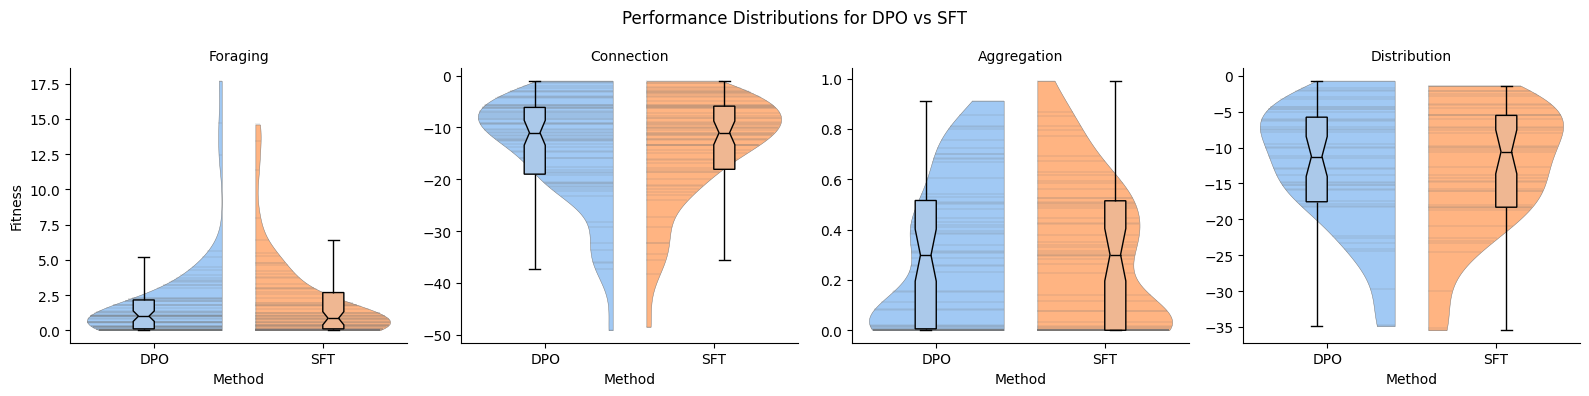

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_violin_boxplot(df, id_var='type', value_vars=['avg_score', 'llm_avg_score'], 
                             score_labels={'avg_score': 'AutoMoDe', 'llm_avg_score': 'LLM'}, 
                             title='Performance Distributions by Mission and Method'):
    """
    Generate a violin and box plot for the given DataFrame.

    Parameters:
    - df: DataFrame containing the data to plot.
    - id_var: Column name to use as identifier variable (default is 'type').
    - value_vars: List of column names to melt (default is ['avg_score', 'llm_avg_score']).
    - score_labels: Dictionary to map score variable names to display labels.
    - title: Title of the plot.
    """
    # Melt the DataFrame
    df_melted = df.melt(id_vars=[id_var], value_vars=value_vars, 
                         var_name='Score Type', value_name='Score')

    # Create a FacetGrid with violin plots
    g = sns.FacetGrid(df_melted, col=id_var, height=4, aspect=1, sharex=True, sharey=False)
    g.map_dataframe(sns.violinplot, x='Score Type', y='Score', hue='Score Type', 
                    split=True, inner='stick', density_norm='area', 
                    palette="pastel", cut=0, dodge=False, native_scale=True, 
                    legend="auto", saturation=1.0, linewidth=0.33)

    # Overlay notched boxplots
    g.map_dataframe(sns.boxplot, x='Score Type', y='Score', hue='Score Type', 
                    dodge=True, width=0.25, palette="pastel", 
                    fliersize=0, notch=True, linewidth=1.0, linecolor="black")

    # Set titles and labels
    g.set_titles(col_template='{col_name}')
    g.set_axis_labels('Method', 'Fitness')

    # Rename the x-tick labels
    for ax in g.axes.flat:
        # Get the current tick positions
        ticks = ax.get_xticks()
        # Set the new tick labels
        ax.set_xticks(ticks)
        ax.set_xticklabels([score_labels.get(label, label) for label in value_vars])

    # Add a title to the figure
    g.figure.suptitle(title)
    g.tight_layout()
    plt.show()

# Example usage:
# generate_violin_boxplot(df_cleaned)

generate_violin_boxplot(df, 
                        id_var='type', 
                        value_vars=['llm_dpo_rl_avg_score', 'llm_avg_score'], 
                        score_labels={'llm_dpo_rl_avg_score': 'DPO', 'llm_avg_score': 'SFT'}, 
                        title='Performance Distributions for DPO vs SFT')